In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
import matplotlib.pyplot as plt
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
from matplotlib import pyplot
import math  
from datetime import datetime


C:\Users\thieu\anaconda3\envs\tsa_course_env1\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [3]:
df = pd.read_csv("C:/Users/thieu/Downloads/Data-Gold.csv",index_col='Date',parse_dates=True)
df.tail(30)

,VND
Date,
2022-11-21,39976008.0
2022-11-22,39982902.0
2022-11-23,40113888.0
2022-11-24,40337943.0
2022-11-25,40306920.0
2022-11-28,40336794.0
2022-11-29,40529826.0
2022-11-30,40442502.0
2022-12-01,41713296.0


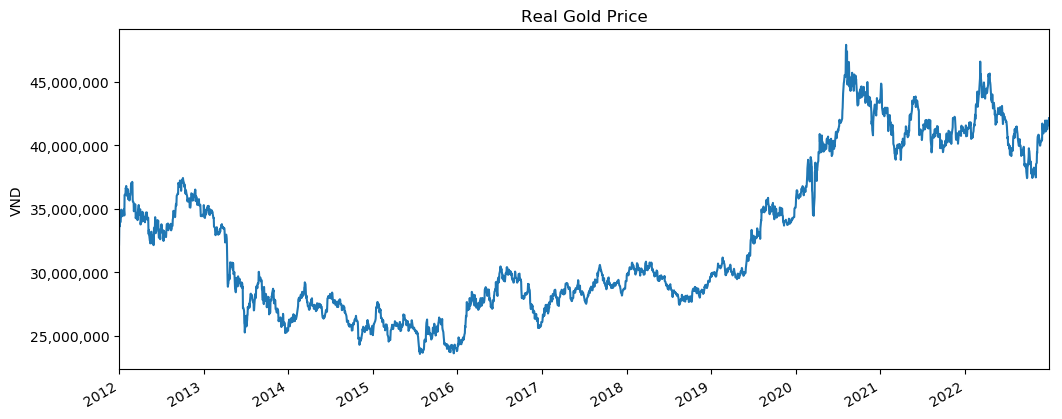

In [4]:
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here

ax = df['VND'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [5]:
adf_test(df['VND'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.681541
p-value                    0.851473
# lags used               22.000000
# observations          2847.000000
critical value (1%)       -3.432649
critical value (5%)       -2.862556
critical value (10%)      -2.567311
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['VND'],k_diff=1)

# Equivalent to:
# df['d1'] = df['VND'] - df['VND'].shift(1)

adf_test(df['d1'],'Real Gold Price')

Augmented Dickey-Fuller Test: Real Gold Price
ADF test statistic     -1.256895e+01
p-value                 2.024078e-23
# lags used             2.100000e+01
# observations          2.847000e+03
critical value (1%)    -3.432649e+00
critical value (5%)    -2.862556e+00
critical value (10%)   -2.567311e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
from sklearn.model_selection import train_test_split 

# Splitting the dataset into 70% training data and 30% testing data.
train, test = train_test_split(df, test_size=.30, random_state=0,shuffle=False)


In [10]:
df = pd.concat([train, test],    # Combine vertically
                          ignore_index = True,
                          sort = False)
df.head(5)   

,VND,d1
0,32202288.50,NaN
1,33607538.00,1405249.50
2,33923003.00,315465.00
3,33628569.00,-294434.00
4,34000652.75,372083.75


In [12]:
auto_arima(train['VND'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2008
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -27968.035
Method:                           css   S.D. of innovations         270862.226
Date:                Mon, 02 Jan 2023   AIC                          55940.069
Time:                        08:21:30   BIC                          55951.279
Sample:                             1   HQIC                         55944.184
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1474.9574   6044.586      0.244      0.807   -1.04e+04    1.33e+04
==============================================================================
"""

In [13]:
model = ARIMA(train['VND'],order=(0,1,0))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.VND   No. Observations:                 2008
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -27968.035
Method:                           css   S.D. of innovations         270862.226
Date:                Mon, 02 Jan 2023   AIC                          55940.069
Time:                        08:21:32   BIC                          55951.279
Sample:                    01-03-2012   HQIC                         55944.184
                         - 09-12-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1474.9574   6044.586      0.244      0.807   -1.04e+04    1.33e+04
==============================================================================
"""

In [14]:
# Obtain predicted values
start = len(train)
end  = len(train)+len(test)-1
pred = fitted.predict(start=start, end=end, dynamic=False, typ='levels')


In [15]:
# Compare predictions to expected values
for i in range(len(pred)):
    print(f"predicted={pred[i]}, expected={test['VND'][i]}")

predicted=35165477.82735558, expected=34883189.85
predicted=35166952.78471116, expected=34763485.67
predicted=35168427.74206674, expected=34888522.25
predicted=35169902.69942232, expected=34898490.25
predicted=35171377.6567779, expected=34834247.27
predicted=35172852.614133485, expected=34851587.23
predicted=35174327.571489066, expected=35317282.9
predicted=35175802.52884465, expected=35286680.98
predicted=35177277.48620023, expected=35471586.25
predicted=35178752.44355581, expected=34949984.13
predicted=35180227.40091139, expected=34567912.58
predicted=35181702.35826697, expected=34460440.77
predicted=35183177.31562255, expected=34186249.04
predicted=35184652.272978134, expected=34629809.2
predicted=35186127.230333716, expected=35198992.25
predicted=35187602.1876893, expected=34781776.88
predicted=35189077.14504488, expected=34830501.25
predicted=35190552.10240046, expected=34936469.53
predicted=35192027.05975604, expected=35007388.5
predicted=35193502.01711162, expected=34680850.27
p

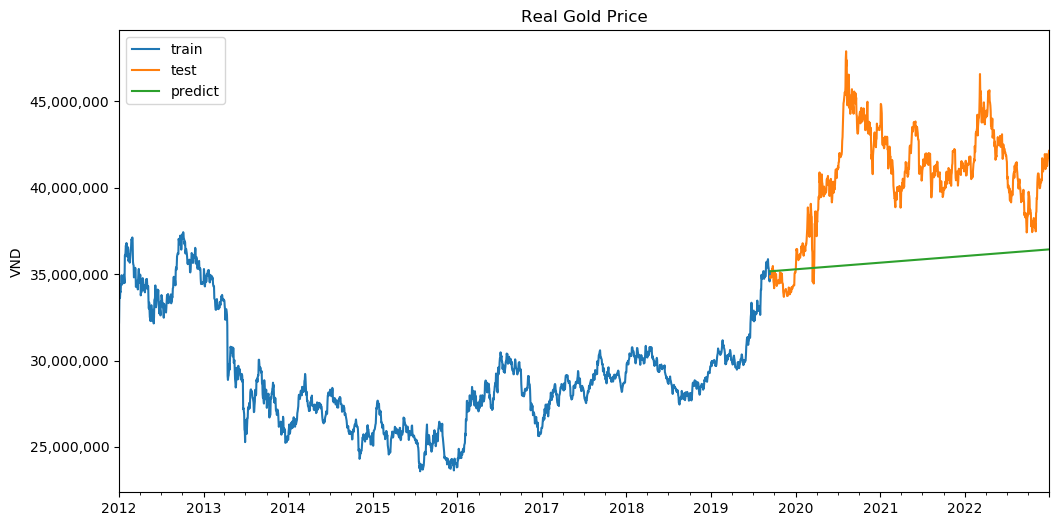

In [16]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here
pd= train['VND'].plot(legend=True,label='train')
ax = test['VND'].plot(legend=True,figsize=(12,6),title=title,label='test')
pred.plot(legend=True,label='predict')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['VND'], pred)
rmse = np.sqrt(mse) 
print("Root Mean Square Error:\n")  
print(rmse)  

Root Mean Square Error:

5578826.492142989


In [18]:

def mape(y_test, pred):
    y_test, pred = np.array(test['VND']), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape
print(mape(test['VND'],pred))

11.856836719214407


In [19]:
model = ARIMA(df['VND'],order=(0,1,0))
result = model.fit()
forecast = result.predict(len(df), len(df)+30, typ='levels')



In [20]:
print(forecast)

2870    4.214189e+07
2871    4.214535e+07
2872    4.214882e+07
2873    4.215228e+07
2874    4.215574e+07
2875    4.215921e+07
2876    4.216267e+07
2877    4.216613e+07
2878    4.216960e+07
2879    4.217306e+07
2880    4.217652e+07
2881    4.217999e+07
2882    4.218345e+07
2883    4.218691e+07
2884    4.219038e+07
2885    4.219384e+07
2886    4.219730e+07
2887    4.220076e+07
2888    4.220423e+07
2889    4.220769e+07
2890    4.221115e+07
2891    4.221462e+07
2892    4.221808e+07
2893    4.222154e+07
2894    4.222501e+07
2895    4.222847e+07
2896    4.223193e+07
2897    4.223540e+07
2898    4.223886e+07
2899    4.224232e+07
2900    4.224579e+07
dtype: float64


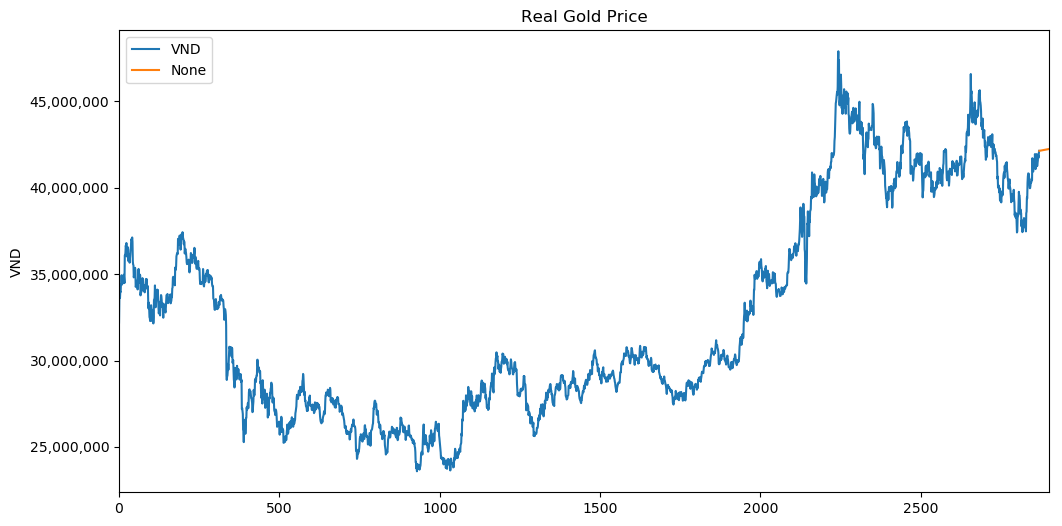

In [21]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here

ax = df['VND'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);